In [ ]:
!unzip /content/drive/MyDrive/memes.zip

Archive:  /content/drive/MyDrive/memes.zip
   creating: memes/
  inflating: memes/images (53).jpeg  
  inflating: memes/images (4).jpeg   
  inflating: memes/images (22).jpeg  
  inflating: memes/images (36).jpeg  
  inflating: memes/images (35).jpeg  
  inflating: memes/images (16).jpeg  
  inflating: memes/images (27).jpeg  
  inflating: memes/images (15).jpeg  
  inflating: memes/images (34).jpeg  
  inflating: memes/Constipation_Meme_4-1296x728-Body4.jpg  
  inflating: memes/images (43).jpeg  
  inflating: memes/images (14).jpeg  
  inflating: memes/images (26).jpeg  
  inflating: memes/images (11).jpeg  
  inflating: memes/images (5).jpeg   
  inflating: memes/images (50).jpeg  
  inflating: memes/images (9).jpeg   
  inflating: memes/images (42).jpeg  
  inflating: memes/download.jpeg     
  inflating: memes/images (37).jpeg  
  inflating: memes/images (45).jpeg  
  inflating: memes/images (32).jpeg  
  inflating: memes/images (20).jpeg  
  inflating: memes/images (38).jpeg  
  i

In [ ]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import DirectoryIterator, ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, TensorBoard
from keras import backend as K

In [ ]:
model_resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
import cv2
im = cv2.imread('/content/memes/images (1).jpeg')
im = im.reshape(1,im.shape[0],im.shape[1],im.shape[2])
print(model_resnet(im)[0].numpy())

[0.25247827 0.22986354 0.02482163 ... 0.12385977 0.         0.7885936 ]


In [ ]:
import os
Embedding_database = {}
path = '/content/memes/'


for items in os.listdir(path):
  im = cv2.imread(path+items)
  im = im.reshape(1,im.shape[0],im.shape[1],im.shape[2])
  Embedding_database[items] = model_resnet(im)[0].numpy()

In [ ]:
print(Embedding_database)

{'images (30).jpeg': array([0.16303399, 1.1058625 , 0.        , ..., 0.        , 0.11517955,
       0.733909  ], dtype=float32), 'images (51).jpeg': array([0.1342248 , 1.3690425 , 0.18134128, ..., 0.36505148, 0.02905589,
       0.533775  ], dtype=float32), 'images (48).jpeg': array([0.27442643, 0.59589916, 1.0583212 , ..., 0.458276  , 0.14760293,
       0.20116478], dtype=float32), 'images (2).jpeg': array([0.00063728, 0.32338545, 0.02501198, ..., 0.00898983, 0.07238888,
       0.12692173], dtype=float32), 'images (25).jpeg': array([0.08016801, 0.43746534, 0.8344559 , ..., 0.09910493, 0.31555623,
       0.3072055 ], dtype=float32), 'images (32).jpeg': array([0.0016069 , 0.83676654, 0.01759264, ..., 1.3245504 , 0.5405429 ,
       0.05030143], dtype=float32), 'images (44).jpeg': array([0.32230675, 0.85423815, 0.8895192 , ..., 0.75245583, 0.22297806,
       0.1674167 ], dtype=float32), 'images (45).jpeg': array([0.41475874, 0.2586208 , 0.25558499, ..., 0.5082339 , 0.18391593,
       0.381

In [ ]:
import pickle

with open('Embedding_database','wb') as f:
  pickle.dump(Embedding_database,f)

In [ ]:
from math import*
import pickle

def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))


with open('Embedding_database','rb') as f:
    Embedding_database = pickle.load(f)


def similar_k(image_id,k):

  recommended = []
  output = Embedding_database[image_id]
  dis_dict = {}
  for key in Embedding_database:
    dis_dict[key] = euclidean_distance(Embedding_database[key],output)

  sorted_dis_dict = dict(sorted(dis_dict.items(), key=lambda item: item[1]))
  i = 0

  for key in sorted_dis_dict:
    if i == k:
      break
    if key == image_id:
      continue;
    else:
        recommended.append(key)

    i = i+1

  return recommended


In [ ]:
recom = similar_k(images (10).jpeg'',5)
print(recom)

['images (9).jpeg', 'leo2-os38ibyfnlo7vdm6aktejmhytlw8mexyxyk4rh20qg.png', 'images (12).jpeg', 'images (8).jpeg', 'images (37).jpeg']


In [ ]:
from google.colab.patches import cv2_imshow

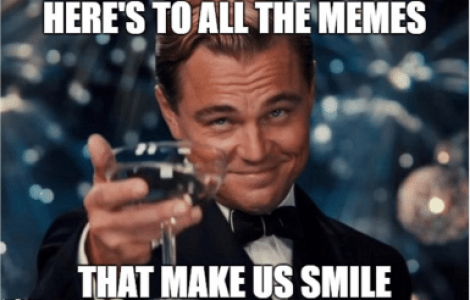